# Accuracy check

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [11]:
targets = ['reliable', 'unreliable']
targets_dict = dict(zip(targets, range(len(targets))))
targets_dict

{'reliable': 0, 'unreliable': 1}

## feature testing

In [48]:
results_tfidf = pd.read_csv('results/predictions_early_80_new_no_count.csv')
results_tfidf.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,1357,"American Dream, Revisited",1,unreliable,0.029137,0.970863
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.222800,0.777200
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.170220,0.829780
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.264810,0.735190
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.108557,0.891443
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,unreliable,0.397320,0.602680
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.932939,0.067061
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,reliable,0.527431,0.472569
8,2445,South Carolina police officer charged with mur...,0,reliable,0.980865,0.019135
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.035463,0.964537


In [49]:
results_tfidf['predict'] = list(map(lambda x: targets_dict[x], results_tfidf['preds']))
results_tfidf.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,1357,"American Dream, Revisited",1,unreliable,0.029137,0.970863,1
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.222800,0.777200,1
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.170220,0.829780,1
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.264810,0.735190,1
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.108557,0.891443,1
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,unreliable,0.397320,0.602680,1
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.932939,0.067061,0
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,reliable,0.527431,0.472569,0
8,2445,South Carolina police officer charged with mur...,0,reliable,0.980865,0.019135,0
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.035463,0.964537,1


In [50]:
y_true_tfidf = results_tfidf.target
y_pred_tfidf = results_tfidf.predict

In [51]:
print(classification_report(y_true_tfidf, y_pred_tfidf))

             precision    recall  f1-score   support

          0       0.88      0.87      0.88       639
          1       0.87      0.88      0.88       628

avg / total       0.88      0.88      0.88      1267



Confusion matrix, without normalization
[[557  82]
 [ 73 555]]


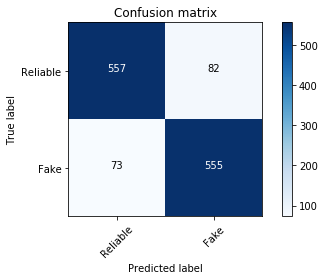

In [52]:
plot_confusion_matrix(confusion_matrix(y_true_tfidf, y_pred_tfidf),['Reliable', 'Fake'])

In [53]:
results_count = pd.read_csv('results/predictions_early_80_new_no_tfidf.csv')
results_count.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,1357,"American Dream, Revisited",1,unreliable,0.028419,0.971581
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.024871,0.975129
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.276427,0.723573
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.461411,0.538589
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.011520,0.988480
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,reliable,0.631546,0.368454
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.943739,0.056261
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.292954,0.707046
8,2445,South Carolina police officer charged with mur...,0,reliable,0.984374,0.015626
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.006540,0.993460


In [54]:
results_count['predict'] = list(map(lambda x: targets_dict[x], results_count['preds']))
results_count.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,1357,"American Dream, Revisited",1,unreliable,0.028419,0.971581,1
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.024871,0.975129,1
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.276427,0.723573,1
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.461411,0.538589,1
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.011520,0.988480,1
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,reliable,0.631546,0.368454,0
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.943739,0.056261,0
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.292954,0.707046,1
8,2445,South Carolina police officer charged with mur...,0,reliable,0.984374,0.015626,0
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.006540,0.993460,1


In [55]:
y_true_count = results_count.target
y_pred_count = results_count.predict

In [56]:
print(classification_report(y_true_count, y_pred_count))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       639
          1       0.91      0.87      0.89       628

avg / total       0.89      0.89      0.89      1267



Confusion matrix, without normalization
[[585  54]
 [ 81 547]]


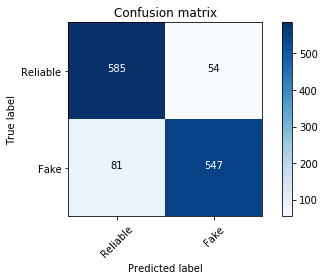

In [57]:
plot_confusion_matrix(confusion_matrix(y_true_count, y_pred_count),['Reliable', 'Fake'])

In [58]:
results_word2vec = pd.read_csv('results/predictions_early_80_new_no_word2vec.csv')
results_word2vec.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,1357,"American Dream, Revisited",1,unreliable,0.240586,0.759414
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.207039,0.792961
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,reliable,0.635833,0.364167
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.404118,0.595882
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.025402,0.974598
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,reliable,0.507576,0.492424
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.947050,0.052950
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.297702,0.702298
8,2445,South Carolina police officer charged with mur...,0,reliable,0.904254,0.095746
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.006087,0.993913


In [59]:
results_word2vec['predict'] = list(map(lambda x: targets_dict[x], results_word2vec['preds']))
results_word2vec.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,1357,"American Dream, Revisited",1,unreliable,0.240586,0.759414,1
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.207039,0.792961,1
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,reliable,0.635833,0.364167,0
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.404118,0.595882,1
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.025402,0.974598,1
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,reliable,0.507576,0.492424,0
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.947050,0.052950,0
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.297702,0.702298,1
8,2445,South Carolina police officer charged with mur...,0,reliable,0.904254,0.095746,0
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.006087,0.993913,1


In [60]:
y_true_word2vec = results_word2vec.target
y_pred_word2vec = results_word2vec.predict

In [61]:
print(classification_report(y_true_word2vec, y_pred_word2vec))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       639
          1       0.87      0.81      0.84       628

avg / total       0.85      0.85      0.85      1267



Confusion matrix, without normalization
[[561  78]
 [118 510]]


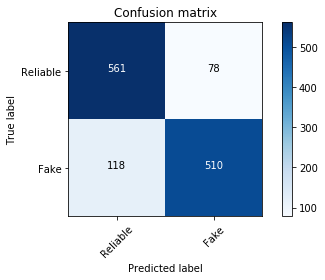

In [62]:
plot_confusion_matrix(confusion_matrix(y_true_word2vec, y_pred_word2vec),['Reliable', 'Fake'])

In [63]:
results_senti = pd.read_csv('results/predictions_early_80_new_no_senti.csv')
results_senti.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,1357,"American Dream, Revisited",1,unreliable,0.024655,0.975345
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.012279,0.987721
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.338331,0.661668
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.367337,0.632664
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.010762,0.989238
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,reliable,0.580991,0.419009
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.951943,0.048057
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.297614,0.702386
8,2445,South Carolina police officer charged with mur...,0,reliable,0.978931,0.021069
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.009148,0.990852


In [64]:
results_senti['predict'] = list(map(lambda x: targets_dict[x], results_senti['preds']))
results_senti.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,1357,"American Dream, Revisited",1,unreliable,0.024655,0.975345,1
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.012279,0.987721,1
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.338331,0.661668,1
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.367337,0.632664,1
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.010762,0.989238,1
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,reliable,0.580991,0.419009,0
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.951943,0.048057,0
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.297614,0.702386,1
8,2445,South Carolina police officer charged with mur...,0,reliable,0.978931,0.021069,0
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.009148,0.990852,1


In [65]:
y_true_senti = results_senti.target
y_pred_senti = results_senti.predict

In [66]:
print(classification_report(y_true_senti, y_pred_senti))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       639
          1       0.91      0.87      0.89       628

avg / total       0.90      0.90      0.89      1267



Confusion matrix, without normalization
[[586  53]
 [ 80 548]]


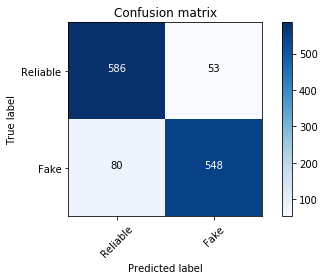

In [67]:
plot_confusion_matrix(confusion_matrix(y_true_senti, y_pred_senti),['Reliable', 'Fake'])

In [68]:
results_readable = pd.read_csv('results/predictions_early_80_new_no_read.csv')
results_readable.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,1357,"American Dream, Revisited",1,unreliable,0.030725,0.969275
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.019626,0.980374
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.292739,0.707261
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.359904,0.640096
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.035180,0.964820
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,unreliable,0.358658,0.641342
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.942044,0.057956
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.283075,0.716925
8,2445,South Carolina police officer charged with mur...,0,reliable,0.966261,0.033739
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.006151,0.993849


In [69]:
results_readable['predict'] = list(map(lambda x: targets_dict[x], results_readable['preds']))
results_readable.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,1357,"American Dream, Revisited",1,unreliable,0.030725,0.969275,1
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.019626,0.980374,1
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.292739,0.707261,1
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.359904,0.640096,1
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.035180,0.964820,1
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,unreliable,0.358658,0.641342,1
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.942044,0.057956,0
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.283075,0.716925,1
8,2445,South Carolina police officer charged with mur...,0,reliable,0.966261,0.033739,0
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.006151,0.993849,1


In [70]:
y_true_readable = results_readable.target
y_pred_readable = results_readable.predict

In [71]:
print(classification_report(y_true_readable, y_pred_readable))

             precision    recall  f1-score   support

          0       0.88      0.89      0.89       639
          1       0.89      0.87      0.88       628

avg / total       0.88      0.88      0.88      1267



Confusion matrix, without normalization
[[571  68]
 [ 80 548]]


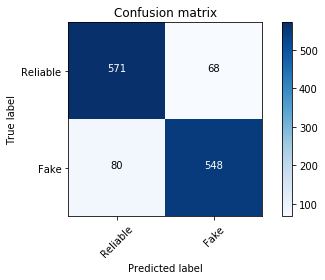

In [72]:
plot_confusion_matrix(confusion_matrix(y_true_readable, y_pred_readable),['Reliable', 'Fake'])

## Prediction distribution visualization

In [78]:
rel = results[results['predict'].astype(str) == '0']['Reliable']
unrel = results[results['predict'].astype(str) == '1']['Reliable']

/opt/Anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


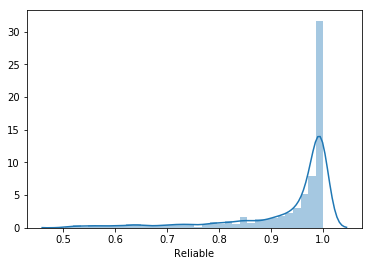

In [79]:
sns.distplot(rel)

/opt/Anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


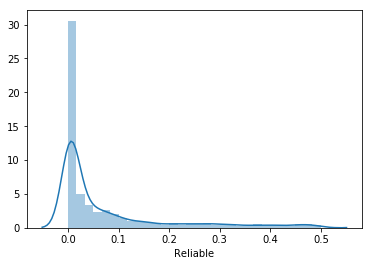

In [80]:
sns.distplot(unrel)